# Helium Neon Laser

## initial imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as con
import uncertainties as un
import uncertainties.unumpy as unp
from scipy.signal import find_peaks


In [2]:
# normalize
def normalize(arr, t_min, t_max):
    arr = arr.to_numpy()
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
def simple_norm(arr):
    arr = arr.to_numpy()
    norm_arr = []
    diff = 1
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr)
        norm_arr.append(temp)
    return norm_arr
def norm2(arr):
    arr = arr.to_numpy()
    diff_arr = max(arr) - min(arr)   
    return arr/diff_arr

## 2. Abhängigkeit der Ausgangsleistung von der Eingangsleistung

Durch Variation des Pumpstromes ist der optimale Arbeitsbereich des Lasers zu ermitteln. Das Ersetzten des Planspiegels durch den Auskoppelspiegel füh
rt zu einer wesentlich höheren Ausgangsleistung und zu einer anderen Eingans-Ausgangsleistungs- Charakteristik. Die Hochspannung der Gasentladung beträgt 2.0 ± 0.1 kV.

### load data

In [3]:
mr2 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.2 Pumpleistung.tsv",decimal=",")
mr2

,Stromstärke I in mA,uI (rechtecksverteilung),Int Planar uW,uPp,int Auskopl in mW,uPa,int Auskopl2 in mW,uPa2
0,5.0,0.086603,43.5,0.6,2.71,0.01,3.05,0.01
1,5.1,0.086603,44.2,0.6,2.72,0.01,3.10,0.01
2,5.2,0.086603,44.9,0.6,2.75,0.01,3.13,0.01
3,5.3,0.086603,45.6,0.6,2.76,0.01,3.16,0.01
4,5.4,0.086603,46.2,0.6,2.80,0.01,3.18,0.01
5,5.5,0.086603,46.8,0.6,2.81,0.01,3.19,0.01
6,5.6,0.086603,47.3,0.6,2.81,0.01,3.23,0.01
7,5.7,0.086603,47.7,0.6,2.84,0.01,3.24,0.01
8,5.8,0.086603,48.2,0.6,2.84,0.01,3.24,0.01
9,5.9,0.086603,48.8,0.6,2.84,0.01,3.25,0.01


In [4]:
Ia = np.empty(0)
for n,u in zip(mr2["Stromstärke I in mA "],mr2["uI (rechtecksverteilung)"]):
    Ia = np.append(Ia,un.ufloat(n,u))
V = un.ufloat(2,0.1)
Pa = Ia * V
uPa = np.empty(0)
for x in Pa:
    uPa = np.append(uPa,x.s)

In [5]:
Pa,uPa

(array([10.0+/-0.5291502622139368, 10.2+/-0.5386093203808101,
        10.4+/-0.5480875842427724, 10.6+/-0.5575840743789928,
        10.8+/-0.5670978751512635, 11.0+/-0.5766281297344746,
        11.2+/-0.5861740355910333, 11.4+/-0.5957348403451641,
        11.6+/-0.6053098380177527, 11.8+/-0.614898365586605,
        12.0+/-0.624499799840703, 12.2+/-0.6341135545003577,
        12.4+/-0.6437390775780807, 12.6+/-0.6533758489576104,
        12.8+/-0.6630233781708442, 13.0+/-0.6726812023544869], dtype=object),
 array([0.52915026, 0.53860932, 0.54808758, 0.55758407, 0.56709788,
        0.57662813, 0.58617404, 0.59573484, 0.60530984, 0.61489837,
        0.6244998 , 0.63411355, 0.64373908, 0.65337585, 0.66302338,
        0.6726812 ]))

### plots

In [6]:
def lin_fit(x,m,c):
    return m*x + c

def exp_fit(x,a,b,c):
    return c -a*np.exp(-b*x) 

x1 = np.linspace(9.5,12.5,500)
x2 = np.linspace(9.5,14,500)

P_a(P_e) = 3.40+/-0.06 P_e + 9.5+/-0.6
laserschwelle = -2.80+/-0.18
P_a(P_e) = 55.4+/-0.9 - (3.2+/-1.0)e+02 e^(-0.33+/-0.04 P_e)


/home/emil/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


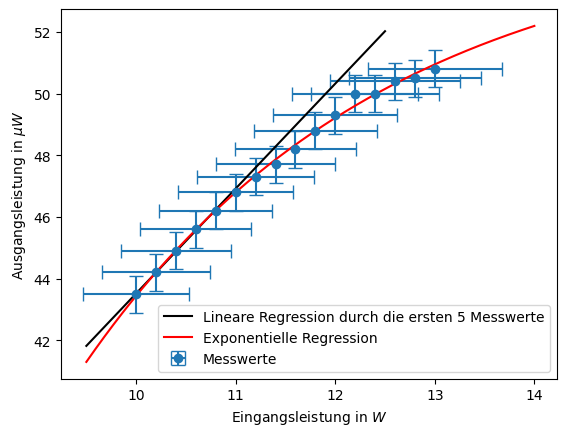

In [7]:
# Planarspiegel
x , y = mr2["Stromstärke I in mA "]*2,mr2["Int Planar uW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPp"],fmt='o', capsize=5, label="Messwerte")

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
# print(c,perr)

print(f"P_a(P_e) = {un.ufloat(c[0],perr[0])} P_e + {un.ufloat(c[1],perr[1])}")
print(f"laserschwelle = {-un.ufloat(c[1],perr[1])/un.ufloat(c[0],perr[0])}")


y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k',label="Lineare Regression durch die ersten 5 Messwerte")

# exponential fit with initial guess
p0 = [2,1.5,50]

c, cov = curve_fit(exp_fit,x,y,p0=p0)
perr = np.sqrt(np.diag(cov))
# print(c,perr)

print(f"P_a(P_e) = {un.ufloat(c[2],perr[2])} - {un.ufloat(c[0],perr[0])} e^(-{un.ufloat(c[1],perr[1])} P_e)")

y2 = exp_fit(x2, c[0], c[1], c[2])
plt.plot(x2,y2,c='r',label="Exponentielle Regression")


plt.legend()

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $\mu W$")
plt.savefig("HeNe-Laser/output/2-Planar.png")

P_a(P_e) = 0.110+/-0.014 P_e + 1.60+/-0.15
P_a(P_e) = 2.912+/-0.015 - (1.5+/-1.6)e+02 e^(-0.66+/-0.11 P_e)


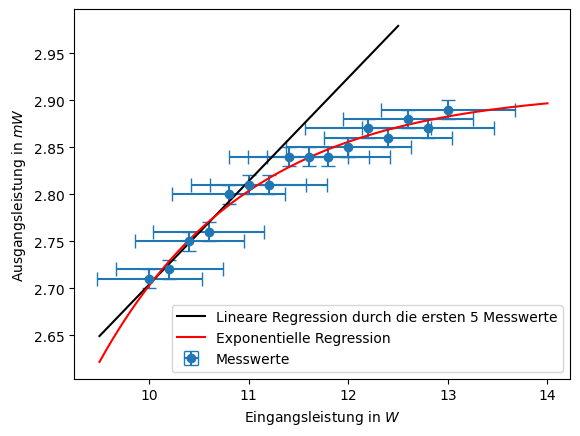

In [8]:
# Auskoppelspiegel
y = mr2["int Auskopl in mW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPa"],fmt='o', capsize=5, label="Messwerte")

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
# print(c,perr)
print(f"P_a(P_e) = {un.ufloat(c[0],perr[0])} P_e + {un.ufloat(c[1],perr[1])}")

y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k',label="Lineare Regression durch die ersten 5 Messwerte")

# exponential fit with initial guess
p0 = [2,1.5,3]

c, cov = curve_fit(exp_fit,x,y,p0=p0)
perr = np.sqrt(np.diag(cov))
# print(c,perr)
print(f"P_a(P_e) = {un.ufloat(c[2],perr[2])} - {un.ufloat(c[0],perr[0])} e^(-{un.ufloat(c[1],perr[1])} P_e)")

y2 = exp_fit(x2, c[0], c[1], c[2])
plt.plot(x2,y2,c='r',label="Exponentielle Regression")

plt.legend()

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $mW$")
plt.savefig("HeNe-Laser/output/2-Auskoppl.png")

P_a(P_e) = 0.160+/-0.015 P_e + 1.46+/-0.16
laserschwelle = (-9.1+/-1.3)e+06
P_a(P_e) = 3.280+/-0.006 - (1.7+/-1.7)e+04 e^(-1.12+/-0.10 P_e)


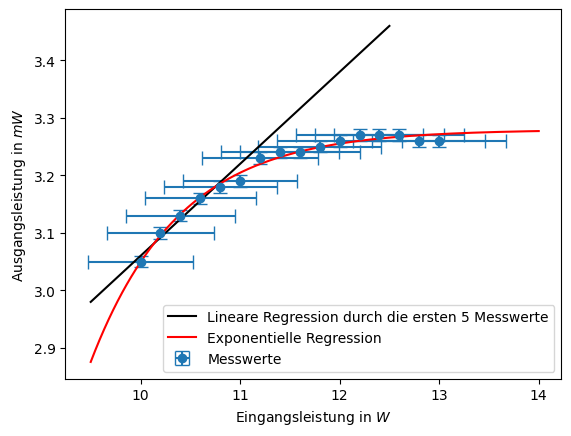

In [9]:
# Auskoppelspiegel versuch 2
y = mr2["int Auskopl2 in mW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPa2"],fmt='o', capsize=5, label="Messwerte")

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
# print(c,perr)

print(f"P_a(P_e) = {un.ufloat(c[0],perr[0])} P_e + {un.ufloat(c[1],perr[1])}")

print(f"laserschwelle = {-un.ufloat(c[1],perr[1])/un.ufloat(c[0],perr[0])*1e6}")

y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k',label="Lineare Regression durch die ersten 5 Messwerte")

# exponential fit with initial guess
p0 = [2,1.5,3.5]

c, cov = curve_fit(exp_fit,x,y,p0=p0)
perr = np.sqrt(np.diag(cov))
# print(c,perr)

print(f"P_a(P_e) = {un.ufloat(c[2],perr[2])} - {un.ufloat(c[0],perr[0])} e^(-{un.ufloat(c[1],perr[1])} P_e)")

y2 = exp_fit(x2, c[0], c[1], c[2])
plt.plot(x2,y2,c='r',label="Exponentielle Regression")

plt.legend()

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $mW$")
plt.savefig("HeNe-Laser/output/2-Auskoppl2.png")

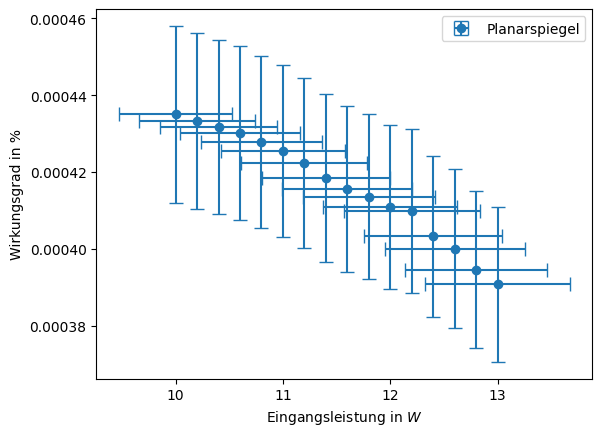

In [10]:
# Planarspiegel
y = mr2["Int Planar uW"]/(mr2["Stromstärke I in mA "]*2)*1e-4
yerr= np.sqrt((y/x * uPa)**2 + (y/mr2["Int Planar uW"] *mr2["uPp"]*1e-4)**2)
plt.errorbar(x,y,xerr=uPa,yerr=yerr,fmt='o', capsize=5,label="Planarspiegel")

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel(r"Wirkungsgrad in %")
plt.legend()
plt.savefig("HeNe-Laser/output/2-Planar-Wirkung.png")

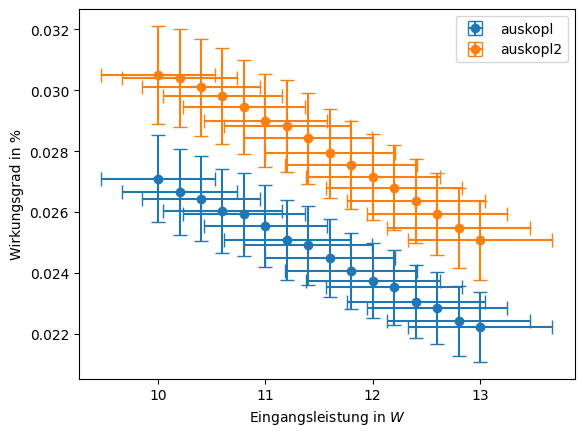

In [11]:
# Auskopl
y = mr2["int Auskopl in mW"]/(mr2["Stromstärke I in mA "]*2)*1e-1
yerr= np.sqrt((y/x * uPa)**2 + (y/mr2["int Auskopl in mW"] *mr2["uPa"]*1e-1)**2)
plt.errorbar(x,y,xerr=uPa,yerr=yerr,fmt='o', capsize=5,label="auskopl")

# Auskopl 2
y = mr2["int Auskopl2 in mW"]/(mr2["Stromstärke I in mA "]*2)*1e-1
yerr= np.sqrt((y/x * uPa)**2 + (y/mr2["int Auskopl2 in mW"] *mr2["uPa2"]*1e-1)**2)
plt.errorbar(x,y,xerr=uPa,yerr=yerr,fmt='o', capsize=5,label="auskopl2")



plt.xlabel("Eingangsleistung in $W$")
plt.ylabel(r"Wirkungsgrad in %")
plt.legend()
plt.savefig("HeNe-Laser/output/2-Auskoppl-Wirkung.png")

qotient auskoppl/planar: 67.36462286029166


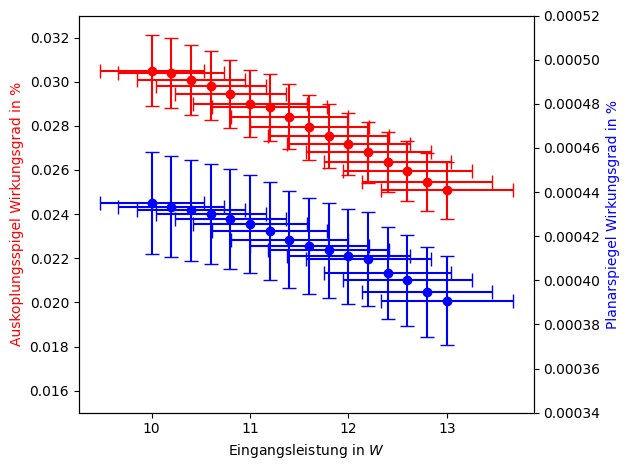

In [12]:
# plt with 2 y axes
fig, ax1 = plt.subplots()

y = mr2["int Auskopl2 in mW"]/(mr2["Stromstärke I in mA "]*2)*1e-1
yerr= np.sqrt((y/x * uPa)**2 + (y/mr2["int Auskopl2 in mW"] *mr2["uPa2"]*1e-1)**2)

avg_auskopl =np.average(y)

ax1.set_xlabel('Eingangsleistung in $W$')
ax1.set_ylabel('Auskoplungsspigel Wirkungsgrad in %', c='r')
ax1.errorbar(x,y,xerr=uPa,yerr=yerr,fmt='o', capsize=5, c='r', label="Auskoplungsspigel")

ax1.set_ylim(0.015, 0.033)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Planarspiegel Wirkungsgrad in %', c='b')  # we already handled the x-label with ax1

# Planarspiegel
y = mr2["Int Planar uW"]/(mr2["Stromstärke I in mA "]*2)*1e-4
yerr= np.sqrt((y/x * uPa)**2 + (y/mr2["Int Planar uW"] *mr2["uPp"]*1e-4)**2)

print(f"qotient auskoppl/planar: {avg_auskopl/np.average(y)}")

ax2.errorbar(x,y,xerr=uPa,yerr=yerr,fmt='o', capsize=5, c='b', label="Planarspiegel")
ax2.set_ylim(0.00034, 0.00052)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("HeNe-Laser/output/2-Wirkungsgrade.png")



## 3. Abhängigkeit der Ausgangsleistung von der Röhrenposition

### load data

In [13]:
mr3 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.3 Röhrenposition.tsv",decimal=",")
mr3

,Röhrenpos in cm,Ausgangsleistung P in mW,uP
0,15,3.50,0.02
1,16,3.53,0.02
2,17,3.62,0.02
3,18,3.66,0.02
4,19,3.57,0.02
5,20,3.41,0.02
6,21,3.40,0.02
7,22,3.31,0.02
8,23,2.96,0.02
9,24,2.61,0.02


In [14]:
uRpos = 0.1 / (2*np.sqrt(6))
uRpos

0.020412414523193152

### plots

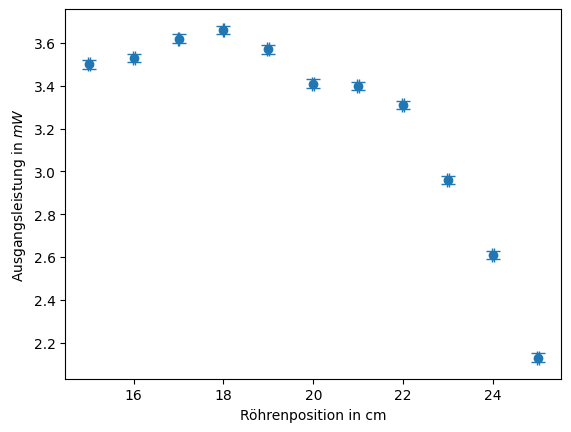

In [15]:
x,y = mr3["Röhrenpos in cm"],mr3["Ausgangsleistung P in mW"]
plt.errorbar(x,y,xerr=uRpos,yerr=mr3["uP"],fmt='o', capsize=5)

plt.xlabel("Röhrenposition in cm")
plt.ylabel("Ausgangsleistung in $mW$")
plt.savefig("HeNe-Laser/output/3-Roehrenpos.png")

## 4. Stabilität des Resonators

### load data

In [16]:
mr4 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.4 Stabilität.tsv",decimal=",")
mr4

,d1 in cm,P1 in uW,uP1,d2 in cm,P2 in uW,uP2,d3 in cm,P3 in uW,uP3,P3 eich
0,55.0,77.0,0.6,55,101.0,0.6,55.0,8.30,0.8,1.63
1,60.0,69.0,0.6,60,99.0,0.6,60.0,7.10,0.8,0.43
2,65.0,48.1,0.6,65,95.2,0.6,65.0,7.04,0.8,0.37
3,67.0,40.5,0.6,70,92.7,0.6,67.0,6.90,0.8,0.23
4,69.0,24.1,0.6,75,75.8,0.6,67.5,6.80,0.8,0.13
5,70.0,23.4,0.6,77,56.7,0.6,68.0,6.67,0.8,0.00
6,71.0,15.5,0.6,79,29.6,0.6,NaN,NaN,NaN,NaN
7,72.0,4.2,0.6,81,18.2,0.6,NaN,NaN,NaN,NaN
8,72.5,0.0,0.6,82,9.4,0.6,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,83,0.0,0.6,NaN,NaN,NaN,NaN


In [17]:
ud = uRpos*np.sqrt(2)
ud

0.02886751345948129

### plots

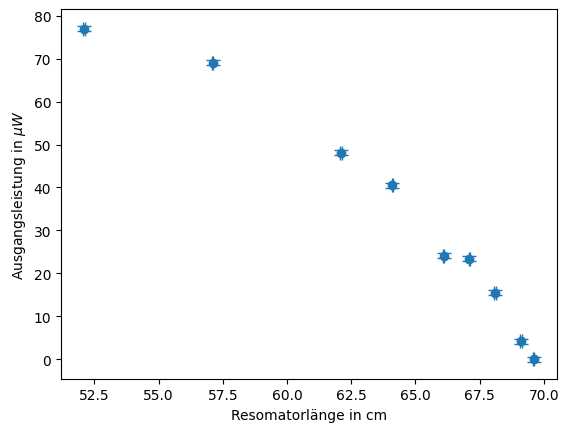

In [18]:
# R700/Plane
x,y = mr4["d1 in cm"]-2.9,mr4[" P1 in uW"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP1"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")
plt.savefig("HeNe-Laser/output/4-stab-r700-plan.png")

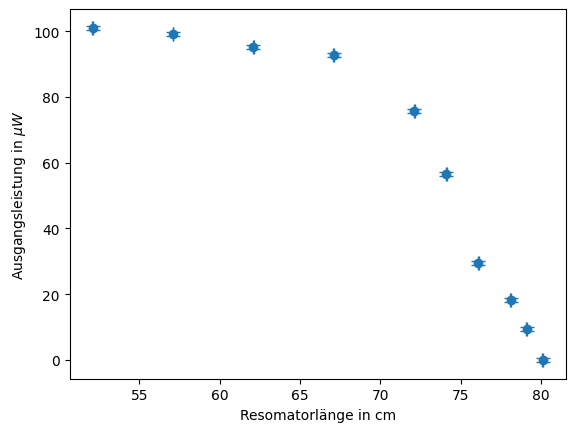

In [19]:
# R850/Plane
x,y = mr4["d2 in cm"]-2.9,mr4[" P2 in uW"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP2"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")
plt.savefig("HeNe-Laser/output/4-stab-r850-plan.png")

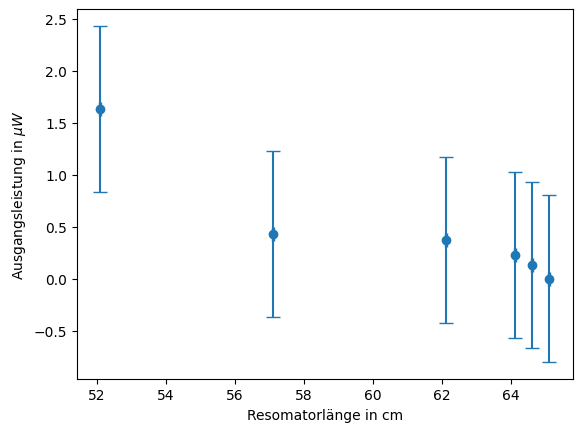

In [20]:
# R700/R850
x,y = mr4["d3 in cm"]-2.9,mr4["P3 eich"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP3"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")
plt.savefig("HeNe-Laser/output/4-stab-r700-r850.png")

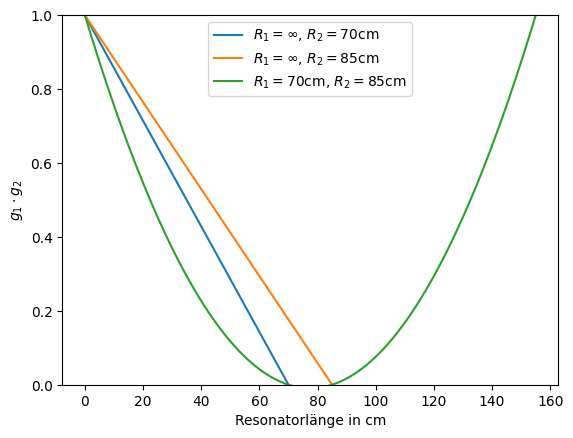

In [21]:
def stab(L,R1,R2):
    return (1.0 - (L/R1))*(1.0 - (L/R2))
def stab_plan(L,R):
    return (1.0 - (L/R))

x = np.linspace(0, 155, 500)
plt.plot(x,stab_plan(x, 70), label="$R_1=\infty$, $R_2=70$cm")
plt.plot(x,stab_plan(x, 85), label="$R_1=\infty$, $R_2=85$cm")
plt.plot(x,stab(x, 70, 85 ), label="$R_1=70$cm, $R_2=85$cm")


plt.legend()
plt.xlabel("Resonatorlänge in cm")
plt.ylabel("$g_1 \cdot g_2$")
plt.ylim(0,1)
# plt.xlim(0,155)

plt.savefig("HeNe-Laser/output/4-theo-stab.png")

## 5. Wellenlängenselektion

### load data

In [22]:
db_633 = pd.read_table("HeNe-Laser/data/633er-mode-db.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
lt_633 = pd.read_table("HeNe-Laser/data/633er-mode-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
lt_640 = pd.read_table("HeNe-Laser/data/640er-mode-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
lt_beide = pd.read_table("HeNe-Laser/data/beide-moden-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')


In [23]:
fl_ohne = pd.read_table("HeNe-Laser/data/fluoreszenz-neon-(ohne-lasing).txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
fl_db_633 = pd.read_table("HeNe-Laser/data/fluoreszenz-db-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
fl_lt_633 = pd.read_table("HeNe-Laser/data/fluoreszenz-littow-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
fl_lt_beide = pd.read_table("HeNe-Laser/data/fluoreszenz-littow-beide.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')

### peaks

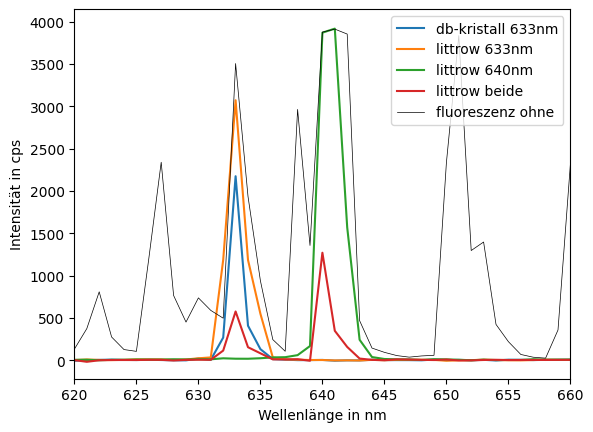

In [24]:
plt.plot(db_633[0],db_633[1],label='db-kristall 633nm')
plt.plot(lt_633[0],lt_633[1],label='littrow 633nm')
plt.plot(lt_640[0],lt_640[1],label='littrow 640nm')
plt.plot(lt_beide[0],lt_beide[1],label='littrow beide')
plt.plot(fl_ohne[0],fl_ohne[1],label='fluoreszenz ohne',c='k',lw=.5)

plt.xlim(620,660)
plt.legend()
plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität in cps")
# gleiche messeinstellungen?
plt.savefig("HeNe-Laser/output/5-peaks.png")

Text(0, 0.5, 'Intensität skaliert mit messdauer')

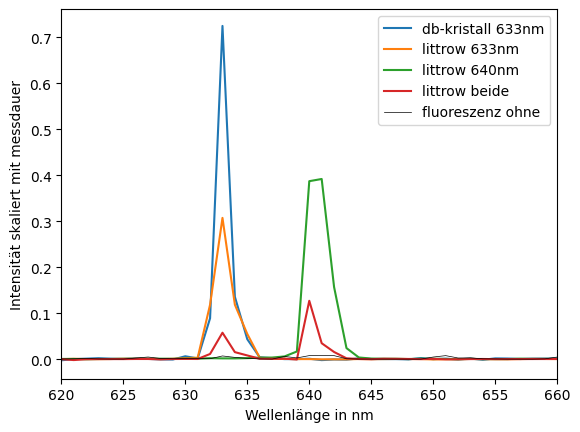

In [25]:
#skalierung mit messdauer
plt.plot(db_633[0],db_633[1]/3000,label='db-kristall 633nm')
plt.plot(lt_633[0],lt_633[1]/10000,label='littrow 633nm')
plt.plot(lt_640[0],lt_640[1]/10000,label='littrow 640nm')
plt.plot(lt_beide[0],lt_beide[1]/10000,label='littrow beide')
plt.plot(fl_ohne[0],fl_ohne[1]/500000,label='fluoreszenz ohne',c='k',lw=.5)

plt.xlim(620,660)
plt.legend()
plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität skaliert mit messdauer")
# gleiche messeinstellungen?
# plt.savefig("HeNe-Laser/output/5-peaks.png")


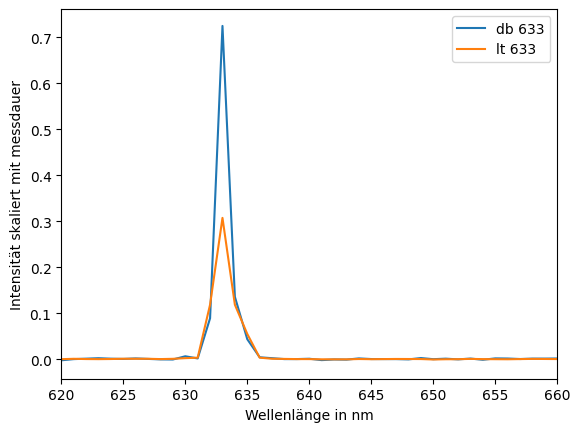

In [26]:
plt.plot(db_633[0],db_633[1]/3000,label='db 633')
plt.plot(lt_633[0],lt_633[1]/10000,label='lt 633')
# plt.plot(fl_ohne[0],fl_ohne[1],label='fluoreszenz ohne lasing')

plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität skaliert mit messdauer")
plt.xlim(620,660)
plt.legend()

### fluoreszenz

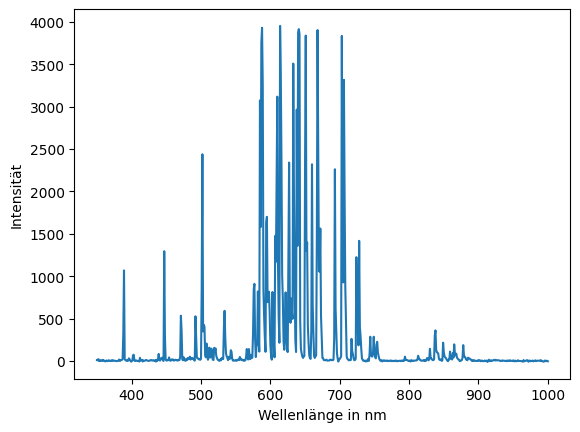

In [27]:
plt.plot(fl_ohne[0],fl_ohne[1],label='fl')

plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz.png")

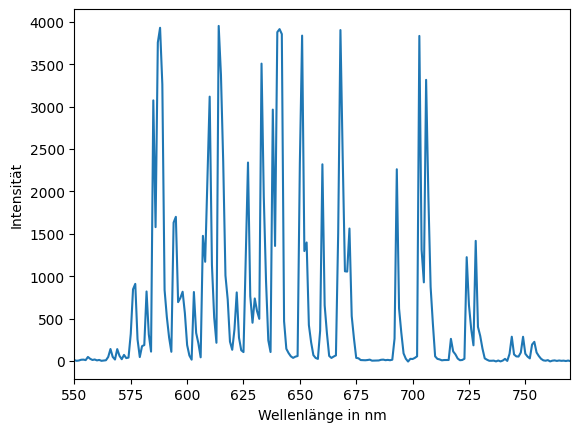

In [28]:
plt.plot(fl_ohne[0],fl_ohne[1],label='fl')
plt.xlim(550,770)

plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-zoom.png")

595.0 130.74
607.0 41.11
610.0 191.5
668.0 184.62


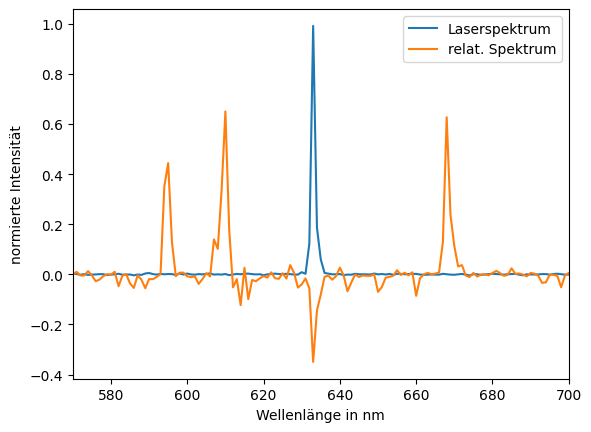

In [29]:
plt.plot(db_633[0],norm2(db_633[1]),label='Laserspektrum')
plt.plot(fl_db_633[0],norm2(fl_db_633[1]),label='relat. Spektrum')

plt.xlim(570,700)
plt.legend()

# find peaks 
peaks = find_peaks(norm2(fl_db_633[1]),height=0.1)
for i in peaks[0]:
    print(fl_db_633[0][i], fl_db_633[1][i])
    
# plt.scatter(fl_db_633[0][peaks[0]],[0]*len(peaks[0]),c='r')

plt.xlabel("Wellenlänge in nm")
plt.ylabel("normierte Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-db-633.png")

528.0 28.45
594.0 117.81
607.0 37.19
610.0 180.25
667.0 48.58
669.0 44.13


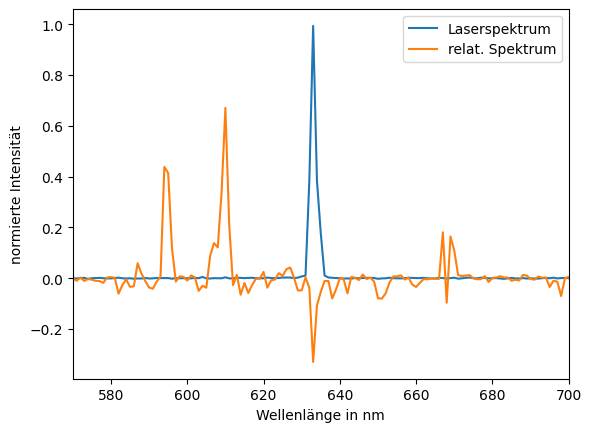

In [30]:
plt.plot(lt_633[0],norm2(lt_633[1]),label='Laserspektrum')
plt.plot(fl_lt_633[0],norm2(fl_lt_633[1]),label='relat. Spektrum')

plt.xlim(570,700)
plt.legend()

# find peaks
peaks = find_peaks(norm2(fl_lt_633[1]),height=0.1)
for i in peaks[0]:
    print(fl_lt_633[0][i], fl_lt_633[1][i])

# plt.scatter(fl_db_633[0][peaks[0]],[0]*len(peaks[0]),c='r')


plt.xlabel("Wellenlänge in nm")
plt.ylabel("normierte Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-lt-633.png")

471.0 7.36
502.0 7.93
595.0 11.61
606.0 26.68
610.0 33.12
616.0 23.67
620.0 7.05
627.0 12.85
638.0 7.35
651.0 18.64
660.0 10.99
667.0 11.65
669.0 32.05
672.0 9.02
692.0 6.81
703.0 22.97
729.0 12.54
528.0 -20.33
633.0 -27.58
642.0 -10.84
650.0 -31.53
652.0 -19.72
706.0 -15.55
995.0 -10.59


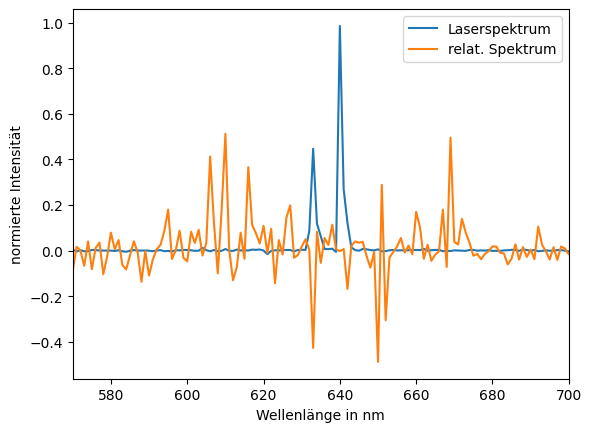

In [31]:
plt.plot(lt_beide[0],norm2(lt_beide[1]),label='Laserspektrum')
plt.plot(fl_lt_beide[0],norm2(fl_lt_beide[1]),label='relat. Spektrum')
# plt.plot(fl_ohne[0],norm2(fl_ohne[1]),label='Spektrum ohne lasing')



plt.xlim(570,700)
plt.legend()

# find peaks
peaks = find_peaks(norm2(fl_lt_beide[1]),height=0.1)
for i in peaks[0]:
    print(fl_lt_beide[0][i], fl_lt_beide[1][i])

# plt.scatter(fl_db_633[0][peaks[0]],[0]*len(peaks[0]),c='r')

#find antipeaks
antipeaks = find_peaks(-norm2(fl_lt_beide[1]),height=0.15)
for i in antipeaks[0]:
    print(fl_lt_beide[0][i], fl_lt_beide[1][i])

# plt.scatter(fl_db_633[0][antipeaks[0]],[0]*len(antipeaks[0]),c='g')

plt.xlabel("Wellenlänge in nm")
plt.ylabel("normierte Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-lt-beide.png")

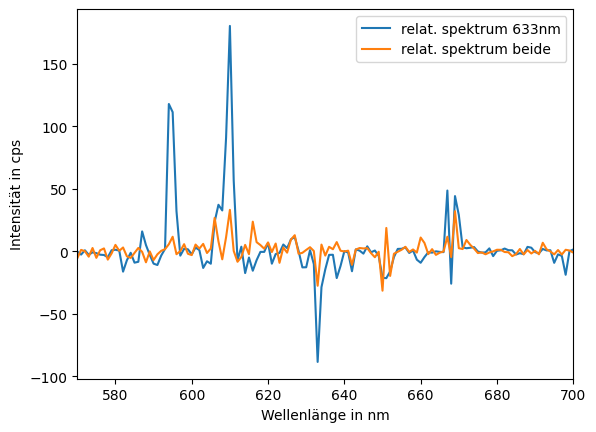

In [32]:
plt.plot(fl_lt_633[0],fl_lt_633[1],label='relat. spektrum 633nm')
plt.plot(fl_lt_beide[0],fl_lt_beide[1],label='relat. spektrum beide')
# plt.plot(fl_ohne[0],fl_ohne[1]/100,label='ohne')

plt.xlim(570,700)

plt.legend()

plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität in cps")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-absolut.png")